In [28]:
# import the necessary packages
import os

from scipy.fft import fft2

import numpy as np
from PIL import Image
import cv2

import tqdm
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

import stitching as st

In [2]:
imagePath = '/home/jack/Videos/map_images/'
imageExtension = 'png'
fileTemplateName = 'image'


images = [imagePath + i for i in os.listdir(imagePath) if imageExtension in i]
imageIndexing = [int(img.split(fileTemplateName)[-1].split('.')[0]) for img in images]

images = np.array(images)[np.argsort(imageIndexing)]

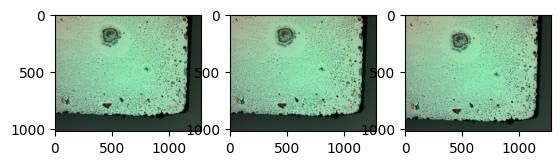

In [3]:
fig, ax = plt.subplots(1, 3)

imgArr = [cv2.imread(images[5*i]) for i in range(3)]

for i in range(3):
    ax[i].imshow(imgArr[i])

plt.show()

100%|███████████████████████████████████████████████████████| 1298/1298 [03:16<00:00,  6.60it/s]


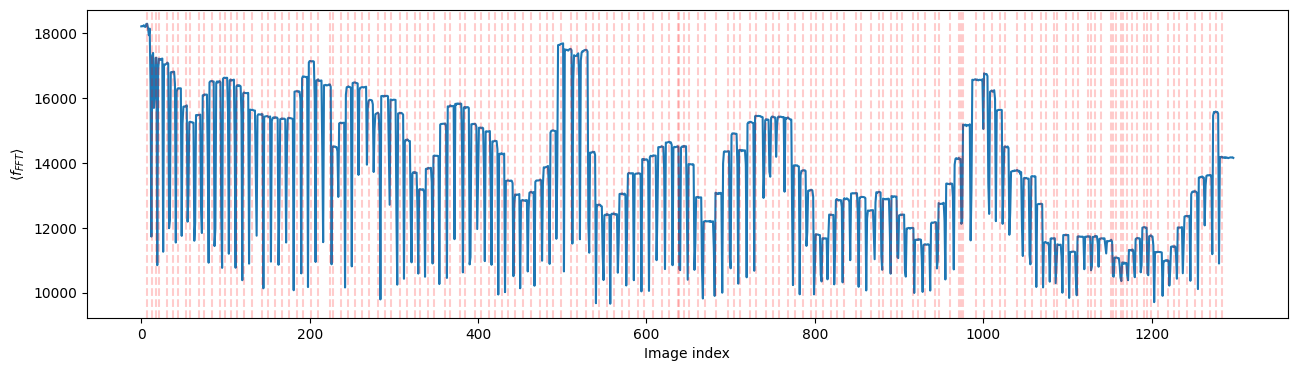

Found 155 stable images


In [16]:
stableImageIndices = st.identifyStableImages(images, debug=True)
print(f'Found {len(stableImageIndices)} stable images')

In [20]:
stableImageIndices

array([   7,   13,   17,   21,   31,   38,   44,   53,   58,   68,   75,
         84,   93,   99,  106,  114,  122,  132,  143,  150,  159,  167,
        175,  185,  192,  201,  210,  224,  228,  237,  246,  254,  262,
        271,  281,  289,  296,  307,  316,  325,  331,  341,  348,  361,
        367,  379,  384,  396,  403,  413,  420,  428,  435,  444,  453,
        463,  474,  482,  489,  499,  510,  518,  528,  536,  544,  553,
        561,  571,  579,  590,  597,  608,  618,  627,  637,  639,  645,
        650,  661,  670,  682,  697,  704,  711,  723,  730,  742,  750,
        757,  768,  777,  786,  795,  801,  810,  819,  826,  835,  849,
        855,  867,  876,  881,  891,  898,  904,  916,  923,  931,  943,
        947,  961,  971,  974,  976,  991, 1001, 1010, 1020, 1026, 1040,
       1049, 1058, 1069, 1074, 1084, 1088, 1098, 1107, 1113, 1124, 1128,
       1133, 1140, 1152, 1154, 1158, 1163, 1166, 1171, 1177, 1183, 1191,
       1195, 1199, 1207, 1219, 1227, 1232, 1242, 12

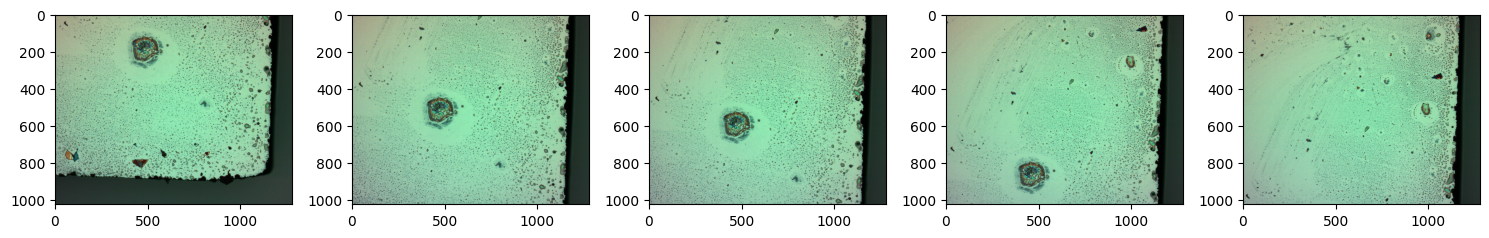

In [5]:
fig, ax = plt.subplots(1, 5, figsize=(15, 4))

imgArr = [cv2.imread(images[i]) for i in stableImageIndices[:5]]

for i in range(len(imgArr)):
    ax[i].imshow(imgArr[i])

fig.tight_layout()
plt.show()

array([[1061399.22415803, 1061573.03237083, 1061747.49035031, ...,
        1047890.58609006, 1047975.50046809, 1048068.31993448],
       [1061597.56421608, 1061777.75485882, 1061956.28679908, ...,
        1048115.47293937, 1048200.78975806, 1048296.12777706],
       [1061802.47485627, 1061981.01244022, 1062163.38998479, ...,
        1048338.470967  , 1048425.76592558, 1048523.29140122],
       ...,
       [1050995.13314812, 1051174.51186761, 1051352.40832894, ...,
        1036723.27097002, 1036816.1170652 , 1036911.01758938],
       [1050982.25230092, 1051164.38959259, 1051343.38601464, ...,
        1036717.14642999, 1036803.5577843 , 1036895.1198312 ],
       [1050973.405168  , 1051155.07975593, 1051333.65666373, ...,
        1036721.16191254, 1036807.84428874, 1036895.00239057]])

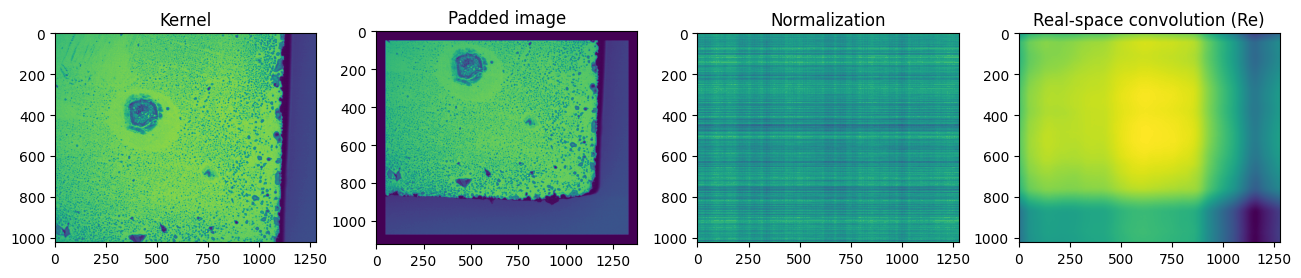

In [7]:
st.kernelFind(imgArr[0]/255, imgArr[1]/255, debug=True)

In [6]:
imgArr = [cv2.imread(images[i]) for i in stableImageIndices[:5]]

stitcher = st.AffineStitcher()#warper_type='affine', crop=True)
stitchedImage = stitcher.stitch(imgArr)

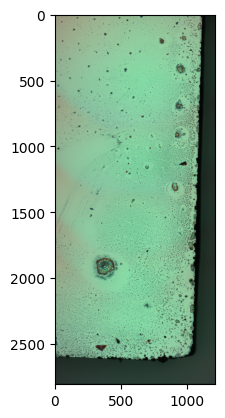

In [7]:
plt.imshow(stitchedImage)
plt.show()

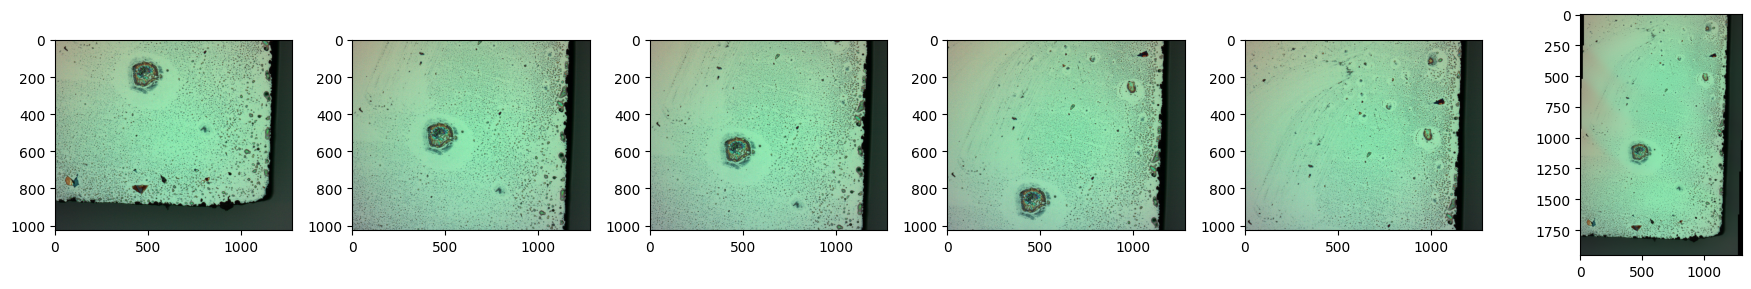

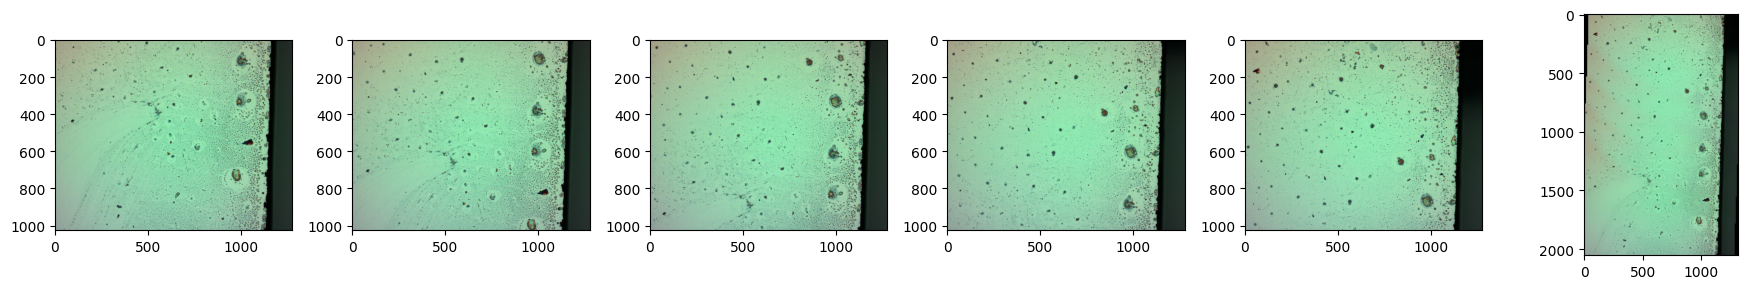

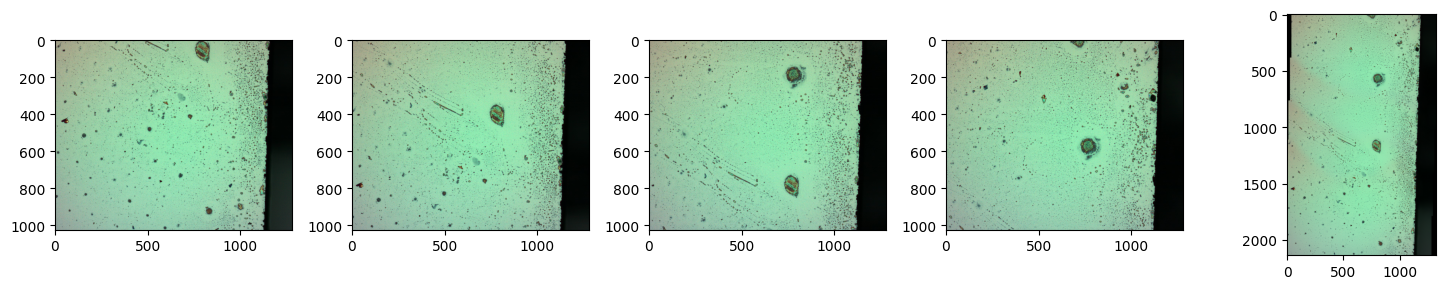

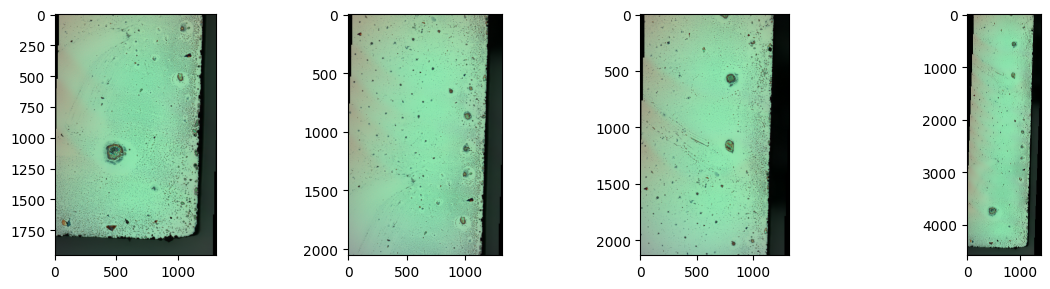

In [6]:
stitcherSettings = {'detector': 'sift',
                    'matcher_type': 'affine',
                    'confidence_threshold': 1,
                    'crop': False}

#imgArr = [cv2.imread(images[i]) for i in stableImageIndices[:20]]
imgArr = [images[i] for i in stableImageIndices[:20]]
debug = True
stitchInterval = 5

currentImages = imgArr
nextImages = []

while len(currentImages) > 1:
    #print(len(currentImages))
    
    for i in range(int(np.ceil(len(currentImages)/stitchInterval))):
        #stitcher = cv2.Stitcher_create()
        #(status, stitched) = stitcher.stitch(currentImages[i*stitchInterval:min((i+1)*stitchInterval, len(currentImages))])
        imageSubset = currentImages[i*stitchInterval:min((i+1)*stitchInterval, len(currentImages))]
                    
        if len(imageSubset) == 1:
            nextImages.append(st.ImageHandler.read_image(imageSubset[0]))
        elif len(imageSubset) > 1:
            
            try:
                stitcher = st.AffineStitcher(**stitcherSettings)
                stitched = stitcher.stitch(imageSubset)
            
                nextImages.append(stitched)
                
                if debug:
                    fig, ax = plt.subplots(1, len(imageSubset)+1, figsize=(len(imageSubset)*3+3,3))
                    for j in range(len(imageSubset)):
                        ax[j].imshow(st.ImageHandler.read_image(imageSubset[j]))
                    ax[-1].imshow(stitched)
                    fig.tight_layout()
                    plt.show()

            except:
                nextImages = nextImages + imageSubset
                print('failed')
            
    currentImages = nextImages
    nextImages = []

# if status == 0:
#     Image.fromarray(np.array(stitched)).save('eg_images/test_stitch.png')
#     plt.imshow(stitched)
#     plt.show()

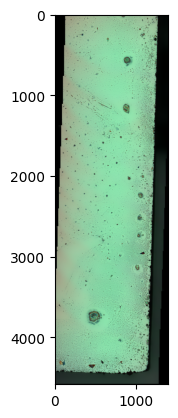

In [10]:
plt.imshow(currentImages[0])
plt.show()

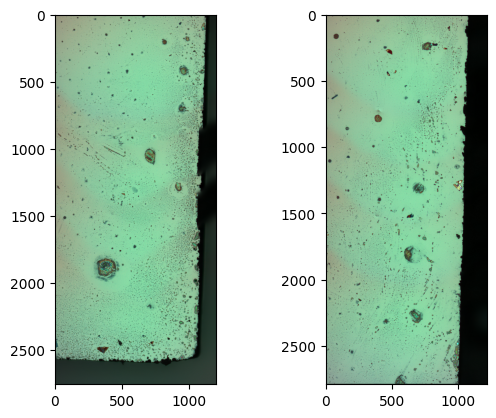

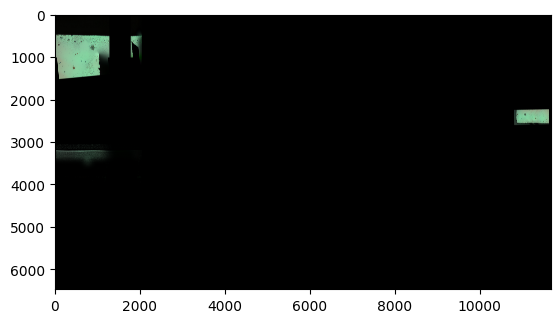

In [33]:
stitcherSettings = {'detector': 'sift',
                    'matcher_type': 'affine',
                    'confidence_threshold': 1,
                    'crop': False}

fig, ax = plt.subplots(1, 2)

for i in range(2):
    ax[i].imshow(currentImages[i])
    
plt.show()
    
stitcher = st.AffineStitcher(**stitcherSettings)
stitched = stitcher.stitch([*currentImages[:3], imgArr[5], imgArr[6]])

plt.imshow(stitched)
plt.show()

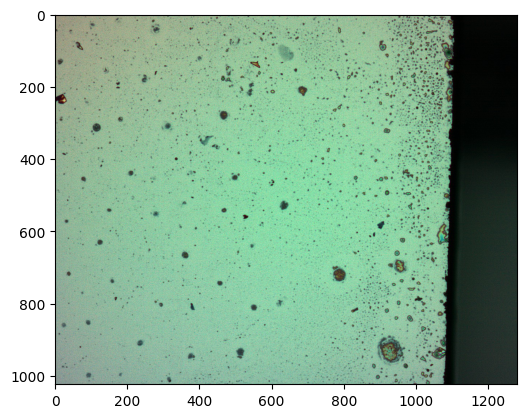

In [20]:
plt.imshow(cv2.imread(imageSubset[1]))
plt.show()

In [7]:
stitcherSettings = {'detector': 'sift',
                    'matcher_type': 'homography',
                    'confidence_threshold': 1.5}

#imgArr = [cv2.imread(images[i]) for i in stableImageIndices[:20]]
imgArr = [images[i] for i in stableImageIndices[:10]]
debug = True
stitchInterval = 6

currentImage = imgArr[0]

for i in tqdm.tqdm(range(1, len(imgArr))):
    #print(len(currentImages))
    
    try:
        stitcher = st.AffineStitcher(**stitcherSettings)
        currentImage = stitcher.stitch([currentImage, imgArr[i]])

    except:
        print('failed; moving on')
# if status == 0:
#     Image.fromarray(np.array(stitched)).save('eg_images/test_stitch.png')
#     plt.imshow(stitched)
#     plt.show()

 44%|███████████████████████████                                  | 4/9 [00:01<00:01,  4.12it/s]

failed; moving on
failed; moving on


 67%|████████████████████████████████████████▋                    | 6/9 [00:01<00:00,  5.36it/s]

failed; moving on
failed; moving on


 89%|██████████████████████████████████████████████████████▏      | 8/9 [00:01<00:00,  6.02it/s]

failed; moving on
failed; moving on


100%|█████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  4.51it/s]

failed; moving on


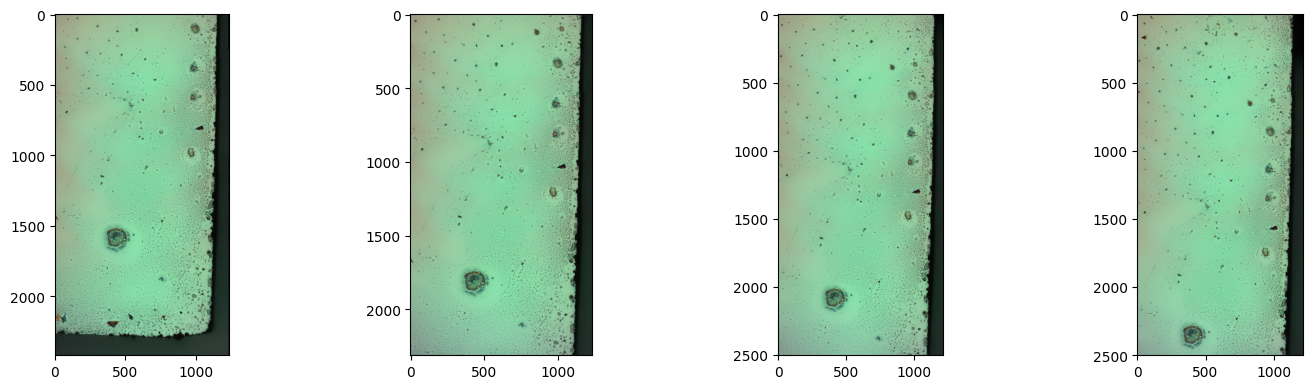

In [16]:
fig, ax = plt.subplots(1, len(currentImages), figsize=(15, 4))

for i in range(len(currentImages)):
    ax[i].imshow(currentImages[i])

fig.tight_layout()
plt.show()

100%|█████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.92s/it]
0it [00:00, ?it/s]


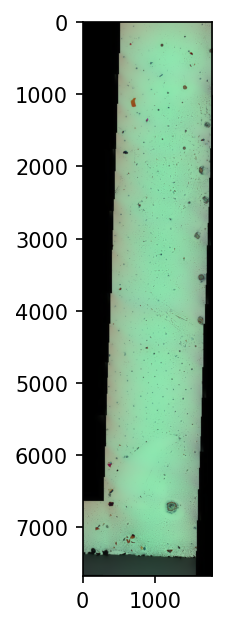

In [40]:
stitcherSettings = {'detector': 'sift',
                    'matcher_type': 'affine',
                    'confidence_threshold': 1,
                    'crop': False}

#imgArr = [cv2.imread(images[i]) for i in stableImageIndices[:20]]
imgArr = [images[i] for i in stableImageIndices[40:80]]
debug = True
stitchInterval = 6

newImages = []
currentImages = imgArr

while len(currentImages) > 0:

    for i in tqdm.tqdm(range(1, len(currentImages)-1, 3)):
        #print(len(currentImages))

        try:
            stitcher = st.AffineStitcher(**stitcherSettings)
            stitched = stitcher.stitch(currentImages[max(i-2,0):min(i+3,len(currentImages))])

            newImages.append(stitched)

        except Exception as e:
            print(e)
            print('failed; moving on')
            #newImages.append([currentImages[2*i], currentImages[2*i+1]])

    currentImages = newImages
    newImages = []
# if status == 0:
#     Image.fromarray(np.array(stitched)).save('eg_images/test_stitch.png')
#     plt.imshow(stitched)
#     plt.show()

plt.imshow(stitched)
plt.show()

In [41]:
stitched2 = stitched

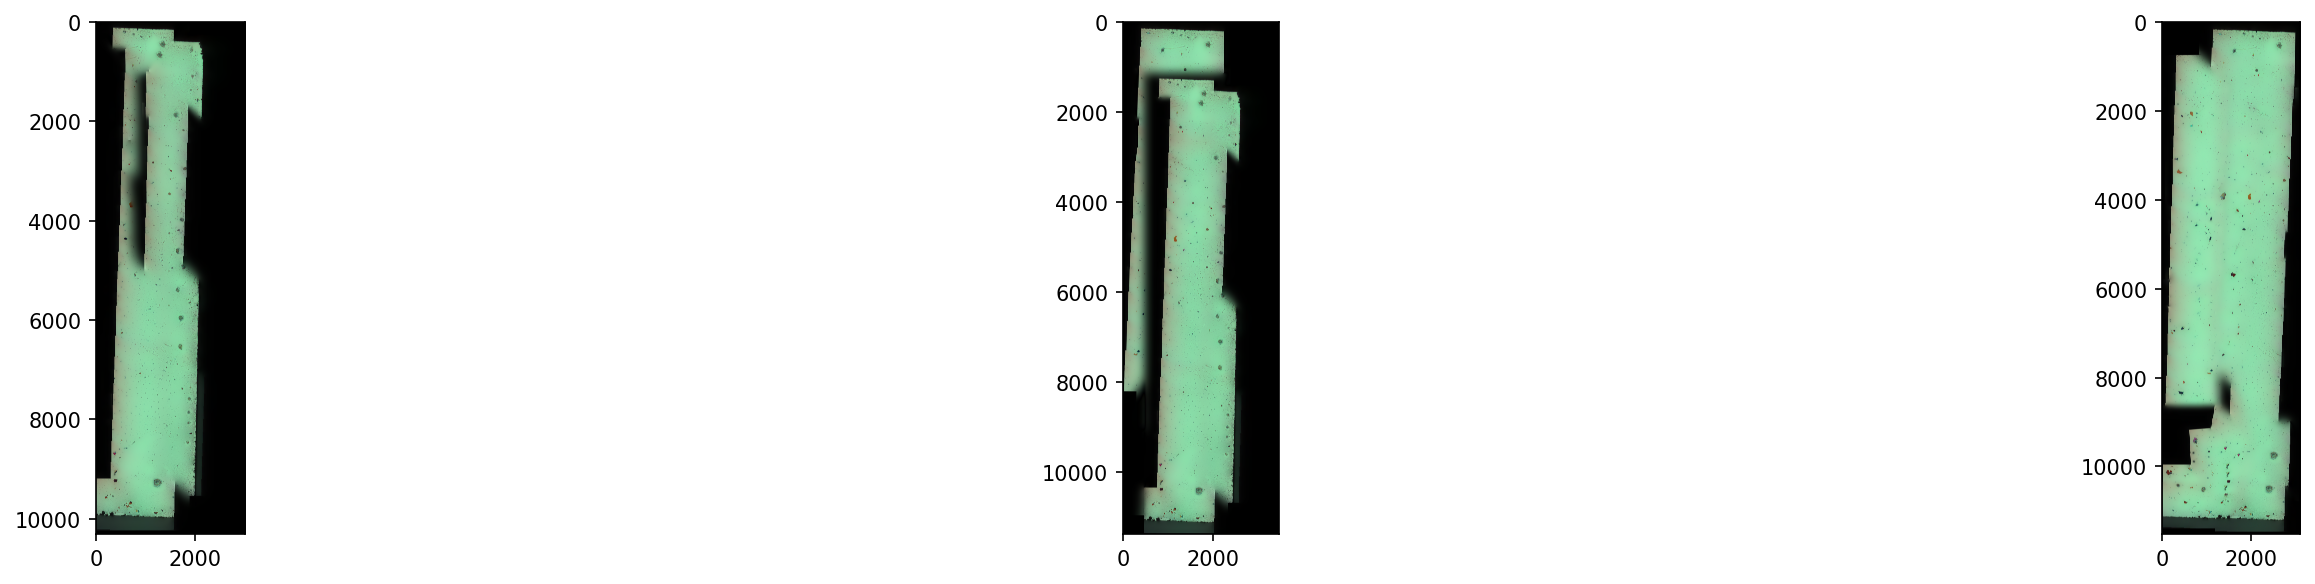

In [35]:
fig, ax = plt.subplots(1, len(currentImages), figsize=(25, 4))

for i in range(len(currentImages)):
    ax[i].imshow(currentImages[i])

fig.tight_layout()
plt.show()

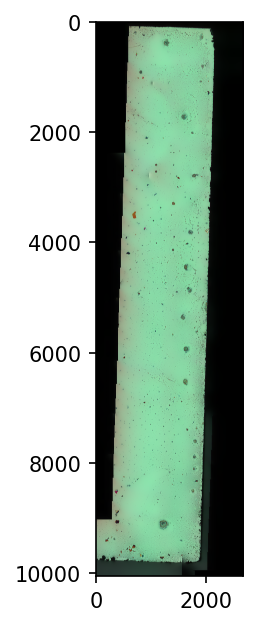

In [42]:
stitcherSettings = {'detector': 'sift',
                    'matcher_type': 'affine',
                    'confidence_threshold': 1,
                    'crop': False}

#imgArr = [cv2.imread(images[i]) for i in stableImageIndices[:20]]
#imgArr = [images[i] for i in stableImageIndices]

stitcher = st.AffineStitcher(**stitcherSettings)
#stitched = stitcher.stitch(imgArr)
stitched = stitcher.stitch([stitched1, stitched2])

plt.imshow(stitched)
plt.show()

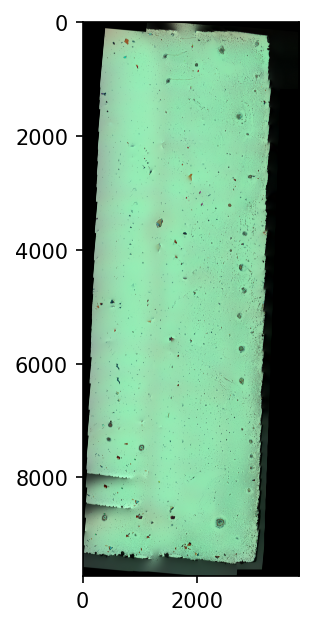

In [29]:
plt.imshow(stitched)
plt.show()

In [47]:

blurArr = np.zeros(len(images)//2)

for i in tqdm.tqdm(range(len(blurArr))):
    img = np.mean(cv2.imread(images[i]), axis=-1)
    fftResult = fft2(img).flatten()
    blurArr[i] = np.abs(np.mean(np.sort(fftResult)[len(fftResult)//5:]))

100%|█████████████████████████████████████████████████████████| 182/182 [00:29<00:00,  6.18it/s]


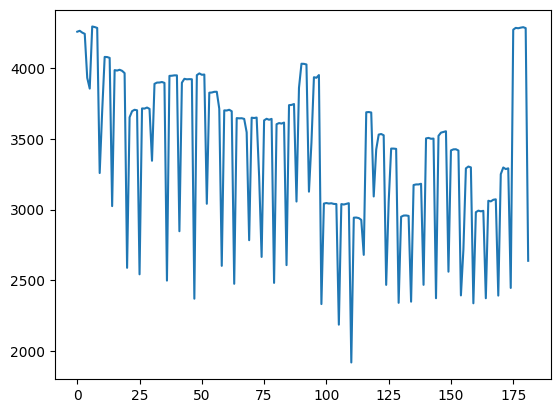

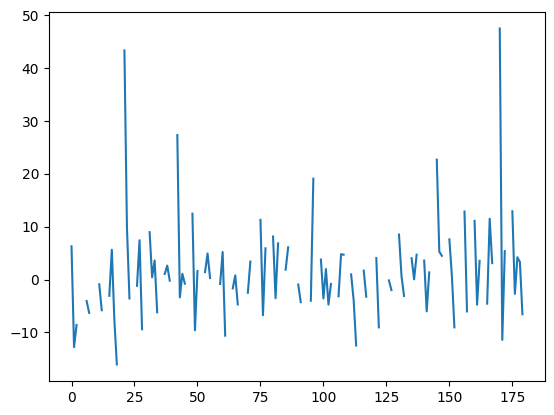

In [69]:
plt.plot(blurArr)
plt.show()

derBlur = blurArr[1:] - blurArr[:-1]
derBlur = np.where(np.abs(derBlur) > .2*np.mean(np.abs(derBlur)), np.nan, derBlur) 

splits = np.where(1 - np.isnan(derBlur))[0]

plt.plot(derBlur)
plt.show()

In [85]:
splitsDiff = np.split(splits, np.where(np.diff(splits) != 1)[0] + 1)

stableImageIndices = [int(np.mean(s)) for s in splitsDiff if not np.isnan(s[0])]


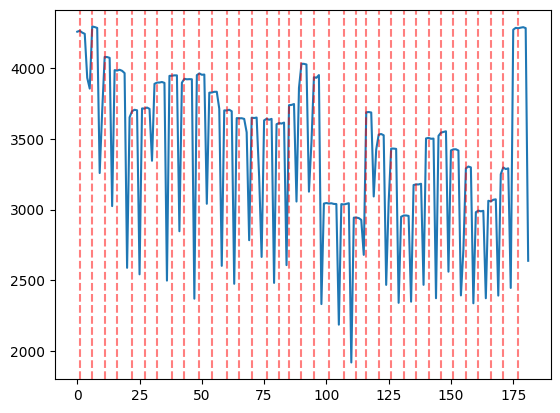

In [90]:
plt.plot(blurArr)

for i in range(len(stableImageIndices)):
    plt.axvline(stableImageIndices[i], linestyle='--', alpha=.5, c='r')
    
plt.show()

In [6]:
def identifyStableImages(images, derThreshold=.2, fftQuantile=.80, debug=False, bar=True):
    
    blurArr = np.zeros(len(images))
    
    if type(images[0]) is np.str_ or type(images[0]) is str:
        imgArr = [cv2.imread(p) for p in images]
    else:
        imgArr = images
        
    for i in tqdm.tqdm(range(len(blurArr))):# if bar else range(len(blurArr)):
        # Grayscale
        img = np.mean(imgArr[i], axis=-1)
        # FFT
        fftResult = fft2(img).flatten()
        # Take average of top {fftQuantile} of frequencies
        blurArr[i] = np.abs(np.mean(np.sort(fftResult)[int(len(fftResult)*fftQuantile):]))
        
    # Take derivative of the blur, and throw out points that have a large value
    derBlur = blurArr[1:] - blurArr[:-1]
    derBlur = np.where(np.abs(derBlur) > derThreshold*np.mean(np.abs(derBlur)), np.nan, derBlur) 

    # Locate where the proper values are, so we can get the center of each group
    splits = np.where(1 - np.isnan(derBlur))[0]

    # The groups of indices for each consecutive non-nan chain
    indexGroups = np.split(splits, np.where(np.diff(splits) != 1)[0] + 1)

    # Take the center of each conecutive non-nan chain
    stableImageIndices = [int(np.mean(s)) for s in indexGroups if not np.isnan(s[0])]

    if debug:
        fig, ax = plt.subplots(1, 1)
        
        ax.plot(blurArr)
        ax.set_xlabel('Image index')
        ax.set_ylabel(r'$\langle f_{FFT} \rangle$')
        
        for i in range(len(stableImageIndices)):
            ax.axvline(stableImageIndices[i], linestyle='--', alpha=.2, c='r')
        
        plt.show()
        
    return stableImageIndices

In [ ]:

# grab the paths to the input images and initialize our images list
imagePaths = sorted(list(paths.list_images(args["images"])))
images = []
# loop over the image paths, load each one, and add them to our
# images to stich list
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
	images.append(image)
# initialize OpenCV's image sticher object and then perform the image
# stitching
print("[INFO] stitching images...")
stitcher = cv2.createStitcher() if imutils.is_cv3() else cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images)

In [92]:
type(images[0])

numpy.str_